In [1]:
# constant
DF_PATH = "../data/processed/2_feed_model.pkl"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# scaling
from sklearn.preprocessing import StandardScaler


# split 
from sklearn.model_selection import train_test_split





In [3]:
# Read Data 
df = pd.read_pickle(DF_PATH)

# MODEL

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
3277675,2,2020-01-17 14:22:52,2020-01-17 14:30:41,2,1.28,1,N,170,113,1.0,7.5,0.0,0.5,1.50,0.0,0.3,12.30,2.5,7.816667
86746,2,2020-01-01 12:37:41,2020-01-01 12:51:38,1,3.05,1,N,144,164,2.0,12.5,0.0,0.5,0.00,0.0,0.3,15.80,2.5,13.950000
3103341,2,2020-01-16 19:30:54,2020-01-16 19:44:12,1,1.82,1,N,236,238,1.0,10.5,1.0,0.5,1.00,0.0,0.3,15.80,2.5,13.300000
453379,1,2020-01-03 18:29:54,2020-01-03 18:35:40,2,1.00,1,N,141,170,1.0,6.0,3.5,0.5,0.52,0.0,0.3,10.82,2.5,5.766667
1478017,1,2020-01-09 08:22:30,2020-01-09 08:29:04,1,1.10,1,N,164,162,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5,6.566667


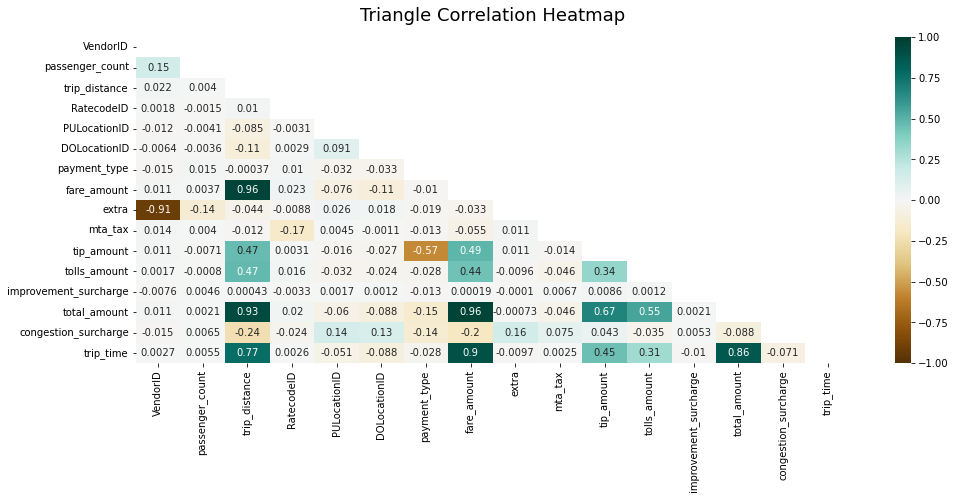

In [5]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_time'],
      dtype='object')

X : 'trip_distance', 'trip_time' 

y : 'fare_amount'

## split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['trip_distance','trip_time']],df['fare_amount'], test_size=0.30, random_state=42)

## scaling

In [8]:
scaler =  StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 3.54116923,  3.74639198],
       [ 0.58378107,  2.33402434],
       [ 0.3390317 ,  0.4501627 ],
       ...,
       [ 1.26907929,  1.55172489],
       [ 4.8995282 ,  4.65343647],
       [-0.64812407, -0.05516045]])

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_train,y_train)

0.9860270036119301

## evaluate with test set

In [11]:
lr_model.score(X_test,y_test)

0.9866763155179639

> the result in the best project is 0.86 with linear regression